<a href="https://colab.research.google.com/github/zoenguyen95-design/music-recommenation-system/blob/main/Music_Analysis_and_Recommeder_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CSIS 4260 - Special Topic of Data Analysis

Group 11

Le Quang Thy Nguyen - 300 312 559


---



#**1. Importing libraries**

In [ ]:
#Import necessary libraries
!pip install spotipy
!pip install scikit-learn

#Data analyze
import json
import pandas as pd
import numpy as np

#Spotify
import spotipy 
from spotipy.oauth2 import SpotifyClientCredentials
from spotipy.oauth2 import SpotifyOAuth
import spotipy.util as util

#Models
import sklearn 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics.pairwise import cosine_similarity
#from sklearn.metrics import confusion_matrix, classification_report

#**2. Data Preparation**


Read dataset from Google Drive 

In [ ]:
# Code to read csv file into Colab:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

''' The shareable link: "4/1AX4XfWhZAdFru3ZNPl3GtPc2z617GX7MT3xBJ3RbAoQz93u38qj8W_nRu3E
 '''
 

' The shareable link: "4/1AX4XfWhZAdFru3ZNPl3GtPc2z617GX7MT3xBJ3RbAoQz93u38qj8W_nRu3E\n '

In [ ]:
#Mounted data from  drive 
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#path to connect from content/drive 
path = "/content/drive/MyDrive/CSIS 4260 - Term Project/SpotifyFeatures.csv"
 
#Read the data csv
song_data = pd.read_csv(path)

''' path = "/content/drive/MyDrive/CSIS 4260 - Term Project/SpotifyFeatures.csv" '''

' path = "/content/drive/MyDrive/CSIS 4260 - Term Project/SpotifyFeatures.csv" '

In [ ]:
''' #Read csv file by uploading from local file 
from google.colab import files
uploaded = files.upload()

song_data= pd.read_csv('SpotifyFeatures.csv') '''

" #Read csv file by uploading from local file \nfrom google.colab import files\nuploaded = files.upload()\n\nsong_data= pd.read_csv('SpotifyFeatures.csv') "

In [ ]:
#Return top 5 rows of the dataframe
song_data.head() 


,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [ ]:
song_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [ ]:
#Checking null value
song_data.isnull().sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [ ]:
# Checking data types to determine numerical data
song_data.dtypes

genre                object
artist_name          object
track_name           object
track_id             object
popularity            int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo               float64
time_signature       object
valence             float64
dtype: object

#**3. Analysing music taste** 



3.1. Histogram


In [ ]:
#Genre Frequency 
song_data.groupby('genre').time_signature.count().sort_values(ascending=False).head()

genre
Comedy        9681
Soundtrack    9646
Indie         9543
Jazz          9441
Pop           9386
Name: time_signature, dtype: int64

In [ ]:
# Eliminate those features which non-numeric data type (object)
numeric_data = song_data.drop(["artist_name","track_name","track_id","key",
                               "mode" , "time_signature"],axis=1)

genre = song_data['genre']


#  Split data into X and y 
X = numeric_data.drop("genre", axis = 1)
y= numeric_data["genre"]

In [ ]:
numeric_data.head()

,genre,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,Movie,0,0.611,0.389,99373,0.910,0.000,0.3460,-1.828,0.0525,166.969,0.814
1,Movie,1,0.246,0.590,137373,0.737,0.000,0.1510,-5.559,0.0868,174.003,0.816
2,Movie,3,0.952,0.663,170267,0.131,0.000,0.1030,-13.879,0.0362,99.488,0.368
3,Movie,0,0.703,0.240,152427,0.326,0.000,0.0985,-12.178,0.0395,171.758,0.227
4,Movie,4,0.950,0.331,82625,0.225,0.123,0.2020,-21.150,0.0456,140.576,0.390


The value of all the features is in the range [0.0 - 1.0].

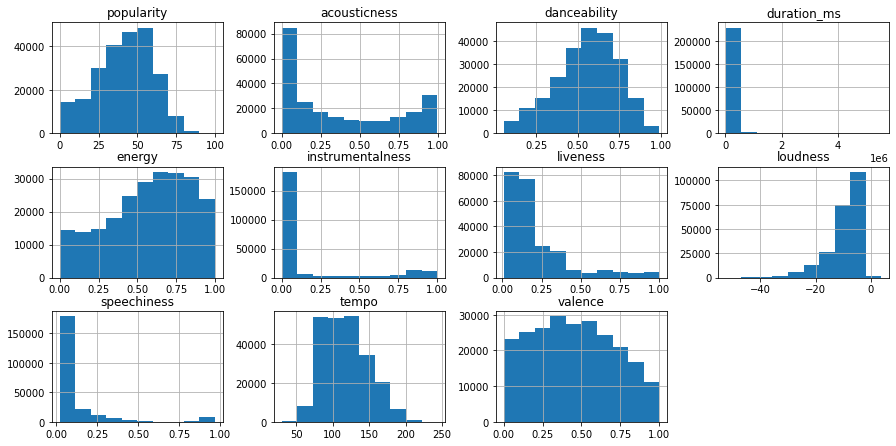

In [ ]:
#Histograms showing music features
numeric_hist = numeric_data.hist(layout=(4,4),figsize=(15,10))
plt.show()

Collection of genres that satisfied the result of music features

In [ ]:
np.unique(genre)

array(['A Capella', 'Alternative', 'Anime', 'Blues', "Children's Music",
       'Children’s Music', 'Classical', 'Comedy', 'Country', 'Dance',
       'Electronic', 'Folk', 'Hip-Hop', 'Indie', 'Jazz', 'Movie', 'Opera',
       'Pop', 'R&B', 'Rap', 'Reggae', 'Reggaeton', 'Rock', 'Ska', 'Soul',
       'Soundtrack', 'World'], dtype=object)

 3.2. Radar chart 


In [ ]:
music_feature= song_data [['danceability','energy','loudness','speechiness',
                           'acousticness','instrumentalness','liveness','valence','tempo','duration_ms']]

#Using MinMax Scaling to normalize
minMax_scaler = MinMaxScaler()

music_feature.loc[:] = minMax_scaler.fit_transform(music_feature.loc[:])




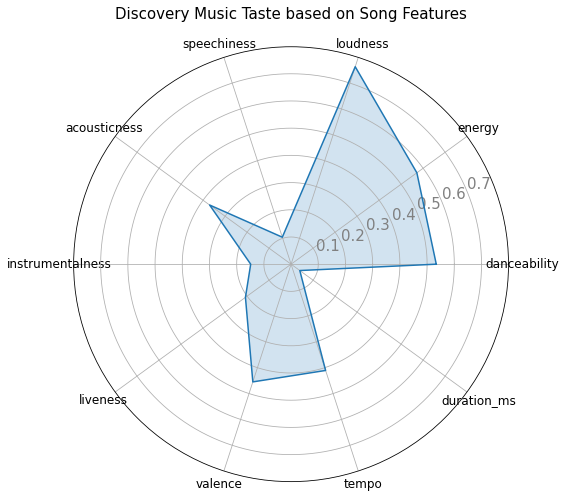

In [ ]:
#Building Radar chart to analyze music taste 
import math
from math import pi,cos,sin,tan,atan  


fig = plt.figure(figsize=(12,8))

categories = list(music_feature.columns)
N = len(categories)

i = list(music_feature.mean())
i+= i[:1]

# calculate angle for each category
angles=[n/float(N)*2* pi for n in range(N)]
angles+=angles[:1]

# plot
plt.polar(angles, i)
plt.fill(angles,i,alpha=0.2)

plt.title('Discovery Music Taste based on Song Features', size=15)

plt.xticks(angles[:-1],categories, size=12)
plt.yticks(color='grey',size=15)
plt.show()

#**4. Modelling**


To analyze/ discovery music feature before building the recommendation system, these models below are considered:
- Random Forest
- K-Nearest Neighbors
- Logistic Regression
- Decision Tree

Spliting the dataset into training and testing 

In [ ]:
# Dividing data into Training and Testing datasets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=20)

#approximately 70 percent of samples will be assigned as the test data, 
#the remaining 30 percent will be assigned to the training data

len(y_train)

len(y_test)

162908

Comparing these models


In [ ]:
randomForest_model = RandomForestClassifier()
KNN_model = KNeighborsClassifier()
logisticReg_model = LogisticRegression()
decisionTree_model = DecisionTreeClassifier()

In [ ]:
randomForest_model.fit(X_train, y_train)
KNN_model.fit(X_train, y_train)
logisticReg_model.fit(X_train, y_train)
decisionTree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
randomForest_acc = randomForest_model.score(X_test, y_test)
KNN_acc = KNN_model.score(X_test, y_test)
logisticReg_acc = logisticReg_model.score(X_test, y_test)
decisionTree_acc = decisionTree_model.score(X_test, y_test)

print("Random Forest Accuracy:", randomForest_acc )
print("K-Nearest Neighbors Accuracy:", KNN_acc)
print("Logistic Regression Accuracy:", logisticReg_acc)
print("Decision Tree Accuracy:", decisionTree_acc) 




Random Forest Accuracy: 0.3996120509735556
K-Nearest Neighbors Accuracy: 0.07519581604341101
Logistic Regression Accuracy: 0.10342647383799446
Decision Tree Accuracy: 0.29056891005966556


Model Visualization by using bar chart

In [ ]:
import plotly.express as px 

figure1 = px.bar(
    x = ["Random Forest", "K-Nearest Neighbors","Logistic Regression", "Decision Tree"],
    y = [randomForest_acc,KNN_acc,logisticReg_acc,decisionTree_acc], 
    color = ["Random Forest","K-Nearest Neighbors","Logistic Regression", "Decision Tree"],
    labels = {'x': "Model", 'y' : "Accuracy"},
    title = "Comparison model accuracy"

)

figure1.show()

From the result, we can see Random Forest is the best model validation

Hyperparameters in a random forest include the number of decision trees in the forest and the amount of attributes that each tree considers while splitting a node.

In [ ]:
#Hyperparameter grid for Random Forest

random_forest_grid={"n_estimators": np.arange(10,1000,10),
         "max_depth":[None,3,5,10],
         "min_samples_split":np.arange(1,100,10),
         "min_samples_leaf":np.arange(1,100,10)}

In [ ]:

#Tune Random Forest model
np.random.seed(40)
random_forest_search=RandomizedSearchCV(RandomForestClassifier(),
                        param_distributions=random_forest_grid,
                        n_iter=20,
                        verbose=True)


random_forest_search.fit(X_train,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91]),
                                        'min_samples_split': array([ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390,
       400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520,
       530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650,
       660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780,
       790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910,
       920, 930, 940, 950, 960, 970, 980, 990])},
                   verbose=True)

In [ ]:
random_forest_search.best_params_


{'max_depth': None,
 'min_samples_leaf': 31,
 'min_samples_split': 71,
 'n_estimators': 260}

In [ ]:
random_forest_search.score(X_test,y_test)

0.42293810003191984

In [ ]:
#Make predictions with tuned model
y_preds=random_forest_search.predict(X_test)
preds_df=pd.DataFrame(y_preds)
preds_df.head()

,0
0,Indie
1,Classical
2,Jazz
3,Reggaeton
4,Soul


In [ ]:
#Comparison actual vs predictions
comparison=pd.DataFrame(data={"Actual":y_preds,"Prediction":y_test})
comparison.head()

,Actual,Prediction
97481,Indie,Children’s Music
219248,Classical,World
176897,Jazz,Jazz
161819,Reggaeton,Reggaeton
731,Soul,Country


#**5. Recommendation System**

**5.1. Content-based Filtering**



In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from scipy.spatial import distance

Normalization


In [ ]:
data = song_data.drop(["track_id","key","mode","time_signature"],1)
df = data.copy()
df = df.drop(["track_name"],1)

In [ ]:
music_feature= ['acousticness','danceability','duration_ms',
           'energy','instrumentalness','liveness','loudness',
           'speechiness','tempo','valence']



In [ ]:
scaler = StandardScaler()
df[music_feature] = scaler.fit_transform(df[music_feature])

In [ ]:
encoder = OneHotEncoder(sparse=False, handle_unknown="ignore")
enc = pd.DataFrame(encoder.fit_transform(np.array(df["genre"]).reshape(-1,1)))
enc.columns = df["genre"].unique()

In [ ]:
df[enc.columns] = enc
df = df.drop("genre",1)
df.head()

,artist_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,Movie,R&B,A Capella,Alternative,Country,Dance,Electronic,Anime,Folk,Blues,Opera,Hip-Hop,Children's Music,Children’s Music,Rap,Indie,Classical,Pop,Reggae,Reggaeton,Jazz,Rock,Ska,Comedy,Soul,Soundtrack,World
0,Henri Salvador,0,0.683376,-0.890935,-1.141368,1.286908,-0.489819,0.660661,1.290703,-0.367970,1.595607,1.380744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Martin & les fées,1,-0.345467,0.191994,-0.821867,0.630249,-0.489819,-0.322835,0.668683,-0.183082,1.823253,1.388435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Joseph Williams,3,1.644570,0.585296,-0.545298,-1.669954,-0.489819,-0.564927,-0.718402,-0.455832,-0.588326,-0.334212,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Henri Salvador,0,0.942701,-1.693703,-0.695295,-0.929789,-0.489819,-0.587623,-0.434817,-0.438044,1.750597,-0.876384,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Fabien Nataf,4,1.638932,-1.203422,-1.282184,-1.313157,-0.083566,-0.065613,-1.930601,-0.405163,0.741433,-0.249618,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df["name"] = data["track_name"]
df["artist"] = data["artist_name"]

df_2 = df.drop(["name","artist"],1)

Looking for the song with the given artist and song name

In [ ]:
def find_similar_track(word,artist):
    a = 0
    b = 0
    song = []
    indexes = []
    for i in data["track_name"]:
        if word.lower() in i.lower() and artist.lower() in data["artist_name"][a].lower():
            song.append(df_2[a:a+1].values)
            indexes.append(a)
            b+=1
        a+=1
    if b == 0:
        print("Nothing found. Please try something else")
        return 0
        
    return song[0][0] , indexes[0]

In [ ]:
#Test the model based on example
word = "summer"
artist = "marshmello"

find_similar_track(word,artist)

(array(['Marshmello', 72, -1.019289193769618, 0.154279759202829,
        -0.015834943066695965, 0.6720021602026667, -0.4102195444250857,
        0.025171035143873133, 0.795554126919687, -0.4935642916271513,
        0.7884572675616396, -0.7725642187650038, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], dtype=object), 109886)

**Cosine distance**


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from scipy.spatial import distance

def similar_tracks(data,number,song = "",artist = ""):

    if (find_similar_track(song,artist) == 0):
        return 0
    else:
        x = find_similar_track(song,artist)[0]
        index = find_similar_track(song,artist)[1]
    p = []
    count=0
    for i in df_2.values:
        p.append([distance.cosine(x,i),count])
        count+=1
    p.sort()
    song_names = df["name"]
    artist_names = df["artist"]

    print("\nList of similarity songs to ",song_names[index]," by ", artist_names[index],"\n")
    for i in range(1,number+1):
        print(i,"- ",song_names[p[i][1]],", ",artist_names[p[i][1]])

 

In [ ]:
#Take sample with 'Summer' of Marshmello
''' song = "summer"
artist = "Marshmello"
number = 5 '''

similar_tracks(df,10,'summer','Marshmello')

**5.2 Connecting to Spotify API**


In [ ]:
''' !pip install requests 
!pip install tekore  '''

In [ ]:
client_id = '7503e136fdc24a899b066851659b779e'
client_secret = '73fe6af126ec47c88bd10de3d30a45ff'

In [ ]:
import requests

auth_url = 'https://accounts.spotify.com/api/token'

# POST method
auth_response = requests.post(auth_url, {
    'grant_type': 'client_credentials',
    'client_id': '7503e136fdc24a899b066851659b779e',
    'client_secret':'73fe6af126ec47c88bd10de3d30a45ff',
})

# JSON encoded
auth_response_data = auth_response.json()

# save the access token
access_token = auth_response_data['access_token']

# GET method
headers = {
    'Authorization': 'Bearer {token}'.format(token=access_token)
}

# base URL of all Spotify API endpoints
base_url = 'https://api.spotify.com/v1/'

# Track ID from the URI (trying with genre is 'trap')
track_id = '6wXkFa3k8WL7pdwkfnLrVk'

# performed the actual GET request with proper header
response = requests.get(base_url + 'audio-features/' + track_id, headers=headers)


In [ ]:
# JSON encoded the response
response = response.json()
print(response)

{'danceability': 0.662, 'energy': 0.911, 'key': 0, 'loudness': -2.971, 'mode': 1, 'speechiness': 0.177, 'acousticness': 0.00942, 'instrumentalness': 0.000167, 'liveness': 0.357, 'valence': 0.272, 'tempo': 139.974, 'type': 'audio_features', 'id': '6wXkFa3k8WL7pdwkfnLrVk', 'uri': 'spotify:track:6wXkFa3k8WL7pdwkfnLrVk', 'track_href': 'https://api.spotify.com/v1/tracks/6wXkFa3k8WL7pdwkfnLrVk', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/6wXkFa3k8WL7pdwkfnLrVk', 'duration_ms': 200000, 'time_signature': 4}


In [ ]:
#Artist_id of 'Marshmello' 
artist_id = '64KEffDW9EtZ1y2vBYgq8T'

# Shows all artists albums
response = requests.get(base_url + 'artists/' + artist_id + '/albums', 
                 headers=headers, 
                 params={'include_groups': 'album', 'limit': 20})
d = response.json()

print("List albums of " + artist ,"\n")
for album in d['items']:
    print( album['name'] ,"(", album['release_date']  ,")" )

List albums of marshmello 

Shockwave ( 2021-06-11 )
Shockwave ( 2021-06-11 )
Shockwave ( 2021-06-11 )
Shockwave ( 2021-06-11 )
Shockwave ( 2021-06-11 )
Shockwave (Clean) ( 2021-06-11 )
Joytime III ( 2019-07-03 )
Joytime II ( 2018-06-22 )
Joytime ( 2016-01-08 )
